<h1> Malaria outlier script</h1>

In [1]:
from __future__ import division
from ml_support import *

%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append('/Users/attiladobi/zenysis')
import db.druid.aggregation_query_wrapper

ImportError: No module named pydruid.query

<h1> Load in the data processed in Predicting_malaria_region_setup </h1>

In [2]:
DF = pd.read_csv('Malaria_regional_monthly_weather.csv', index_col=0)

In [3]:
DF.head()

,Indicator_id,val,Region,Indicator,RegionLat,RegionLon,gen_cat,age_cat,E_Date,E_year,...,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,ELEVATION,LAT,LON
0,Email or internet access,1.000000,harreri,Email or internet access,9.28966,42.172526,-1,-1,2009-03-01,2009,...,9.920690,NaN,88.234483,61.913793,0.008571,NaN,344.827586,1158.8,9.625,41.854
1,Facility connected to the central power supply...,8.000000,harreri,Facility connected to the central power supply...,9.28966,42.172526,-1,-1,2009-03-01,2009,...,9.920690,NaN,88.234483,61.913793,0.008571,NaN,344.827586,1158.8,9.625,41.854
2,Land line telephone,7.000000,harreri,Land line telephone,9.28966,42.172526,-1,-1,2009-03-01,2009,...,9.920690,NaN,88.234483,61.913793,0.008571,NaN,344.827586,1158.8,9.625,41.854
3,hmis_c_1_3_1,0.022865,harreri,Proportion of households' access to latrine fa...,9.28966,42.172526,-1,-1,2007-01-01,2007,...,10.524138,NaN,90.955172,67.675862,0.248519,NaN,3450.689655,1158.8,9.625,41.854
4,hmis_c_1_3_1,0.165079,harreri,Proportion of households' access to latrine fa...,9.28966,42.172526,-1,-1,2007-04-01,2007,...,6.220000,NaN,84.514286,58.914286,0.000000,NaN,0.000000,1158.8,9.625,41.854


In [4]:
DF.columns

Index([u'Indicator_id', u'val', u'Region', u'Indicator', u'RegionLat',
       u'RegionLon', u'gen_cat', u'age_cat', u'E_Date', u'E_year', u'E_month',
       u'month', u'year', u'capital', u'pop', u'density', u'ave_temp',
       u'ave_prec_mm', u'elevation_m', u'infection_rate', u'is_capital',
       u'net_frac', u'STN', u'STN_dist_km', u'YEAR_MONTH', u'WBAN',
       u'YEARMODA', u'TEMP', u'DEWP', u'SLP', u'STP', u'VISIB', u'WDSP',
       u'MXSPD', u'GUST', u'MAX', u'MIN', u'PRCP', u'SNDP', u'FRSHTT',
       u'ELEVATION', u'LAT', u'LON'],
      dtype='object')

In [5]:
DF.groupby('Indicator').count()

,Indicator_id,val,Region,RegionLat,RegionLon,gen_cat,age_cat,E_Date,E_year,E_month,...,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,ELEVATION,LAT,LON
Indicator,,,,,,,,,,,,,,,,,,,,,
Email or internet access,11,11,11,11,11,11,11,11,11,11,...,6,0,7,7,7,0,7,7,7,7
Facility connected to the central power supply/grid,11,11,11,11,11,11,11,11,11,11,...,6,0,7,7,7,0,7,7,7,7
Land line telephone,11,11,11,11,11,11,11,11,11,11,...,6,0,7,7,7,0,7,7,7,7
Malaria positivity rate,314,314,314,314,314,314,314,314,314,314,...,195,0,203,203,203,0,203,203,203,203
Number of HHs that need LLINs in the last 12 months,11,11,11,11,11,11,11,11,11,11,...,7,0,7,7,7,0,7,7,7,7
Number of Households utilizing latrine,94,94,94,94,94,94,94,94,94,94,...,57,0,59,59,59,0,59,59,59,59
Number of slides or RDT positive for malaria,314,314,314,314,314,314,314,314,314,314,...,195,0,203,203,203,0,203,203,203,203
Number of slides or RDT positive for malaria 5-14 years: Females,311,311,311,311,311,311,311,311,311,311,...,192,0,200,200,200,0,200,200,200,200
Number of slides or RDT positive for malaria 5-14 years: Males,312,312,312,312,312,312,312,312,312,312,...,193,0,201,201,201,0,201,201,201,201


<h3> explore only one indicator </h3>

In [6]:
indicator = 'Number of slides or RDT positive for malaria'
indicator = 'Number of slides or RDT positive for malaria >=15 years: Males'
region = 'amhara'

In [537]:
region = 'addis ababa'
#region = 'amhara'

<h1> Plot time series </h1>

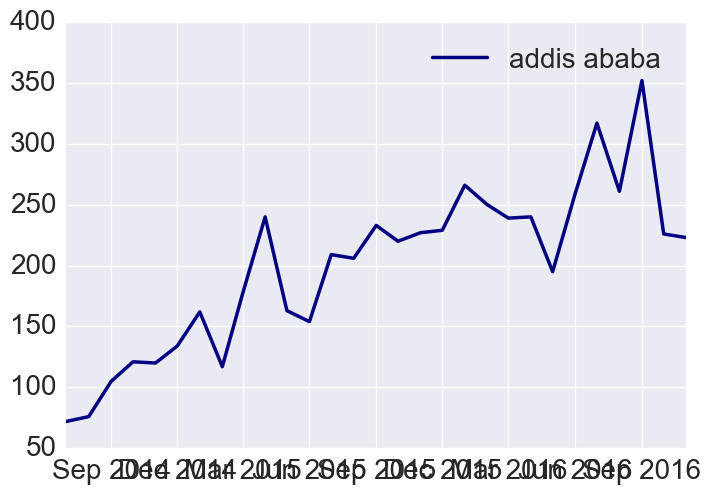

In [538]:
# Plot temp:
temp_series = DF.loc[(DF['Indicator'] == indicator) & (DF['Region'] == region)].groupby(['Region','YEAR_MONTH']).sum().val

start,stop=0,1
number_of_colors= len(temp_series.index.levels[0])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]
    
for region, color in zip(temp_series.index.levels[0], colors):
    
    x = pd.to_datetime(temp_series[region].index)
    y = temp_series[region].values
    plot(x, y, color=color , label=region)
plt.legend()

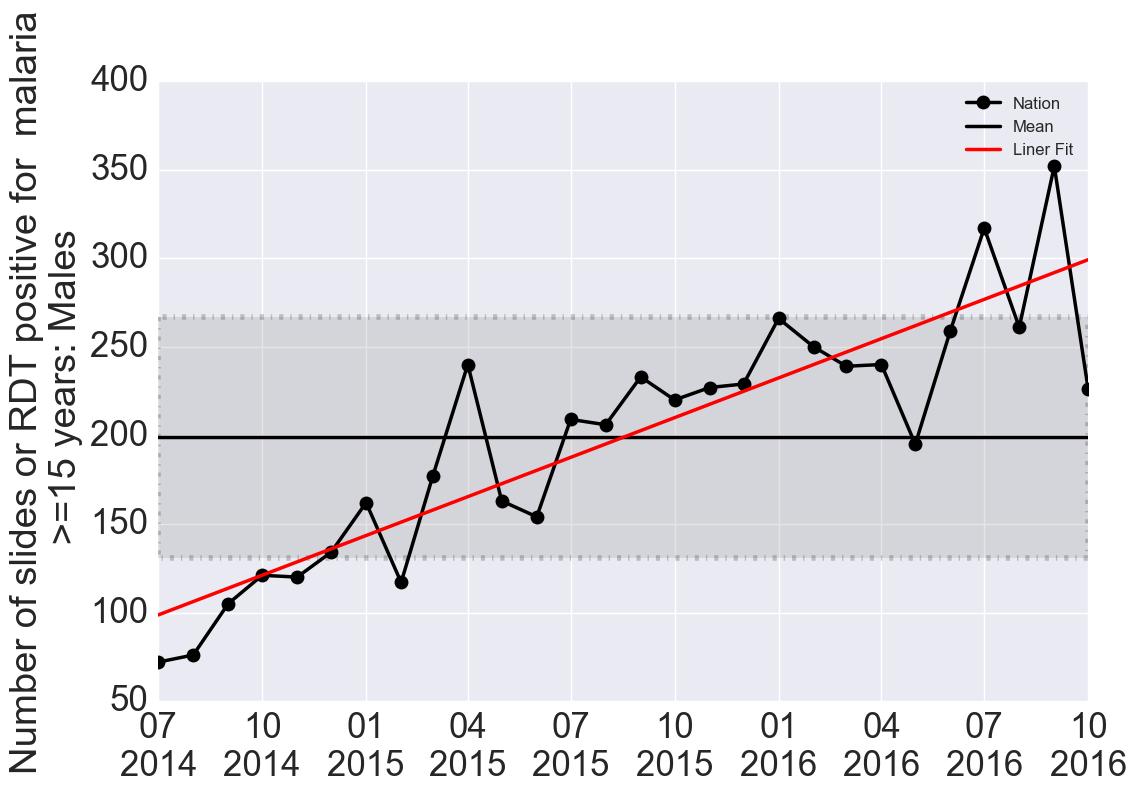

In [539]:
a = plot_ind_region(DF, indicator=indicator, region= region, date_type='YEAR_MONTH', \
                   plt_err=False, plt_mean=True, plt_std=True)

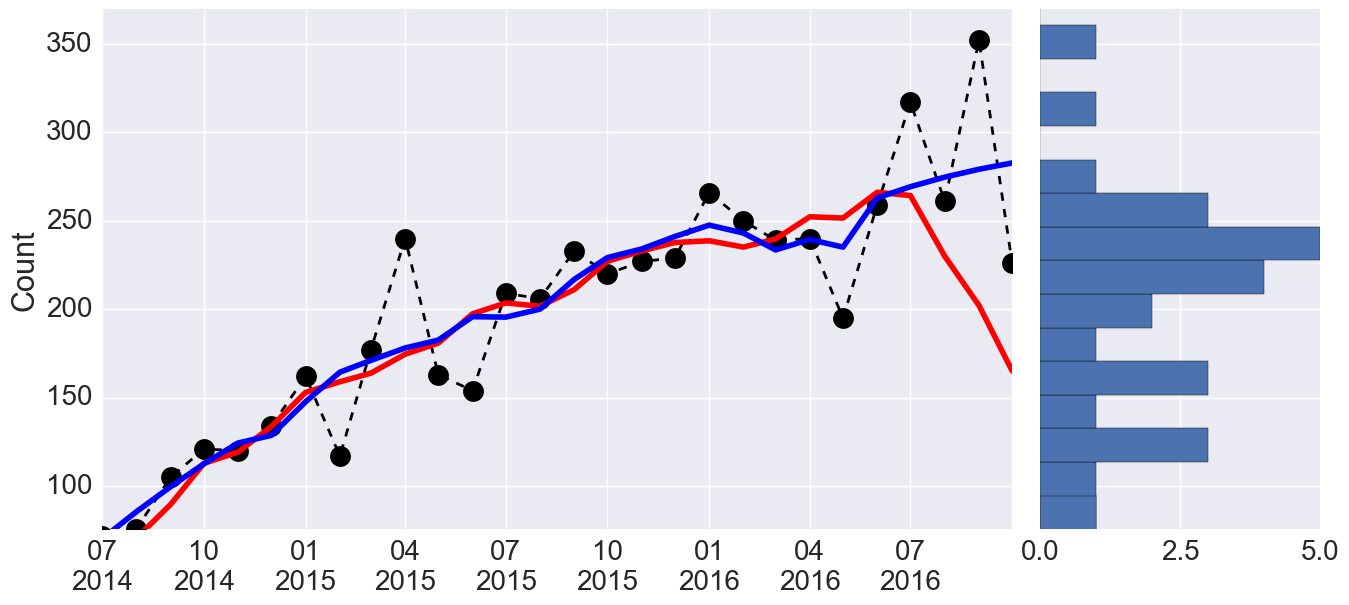

In [540]:
from matplotlib.ticker import NullFormatter
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

fig = figure()
fig.set_size_inches(14, 8)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    
# the data
x = pd.to_datetime(a.index)
y = a.values

y_ma = movingaverage(y, 7)

# Savitzky Golay filter

y_SG = savgol_filter(y, 9, 2)

# Smooth spline for centroid subtraction
spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(20000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))


axScatter = plt.axes(rect_scatter)
#axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.plot(x, y, '--o', markersize=15, color = 'k', linewidth = 2)
axScatter.set_ylabel('Count')
axScatter.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
# Hide last tick
axScatter.xaxis.get_ticklabels()[-1].set_visible(False)

#plot spline
#axScatter.plot(x, spl(np.float64(x)), 'b', lw=3)
#plot moving average
axScatter.plot(x, y_ma, 'r', linewidth=4)
# Plot SG filter
axScatter.plot(x, y_SG, 'b', linewidth=4)


# now determine limits:
#xmin, xmax = np.min(x), np.max(x)
ymin, ymax = 1.05*np.min(y), 1.05*np.max(y)

#xbinwidth = 1
ybinwidth = int( (ymax - ymin) / 15)

#axScatter.set_xlim((xmin, xmax))
axScatter.set_ylim((ymin, ymax))

#xbins = np.arange(xmin, xmax + xbinwidth, xbinwidth)
ybins = np.arange(ymin, ymax + ybinwidth, ybinwidth)
#axHistx.hist(x, bins=xbins)
yhist = axHisty.hist(y, bins=ybins, orientation='horizontal', normed=False)
ycenters = (ybins[:-1] + ybins[1:]) / 2

#axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
axHisty.set_xticks(np.linspace(0, max(yhist[0]), 3))

#Fit the data
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

#popt, pcov = curve_fit(gaussian, ycenters, yhist[0], [len(y), np.mean(y), np.std(y)])

# Plot the PDF.
#x = np.linspace(ymin, ymax, 100)
#p = gaussian(x, *popt)
#axHisty.plot(p, x, 'r', linewidth=2)

plt.show()

In [533]:
[len(y), np.mean(y), np.std(y)]

[28, 26220.714285714286, 12915.273997030314]

<h1> centroid subtracted </h1>

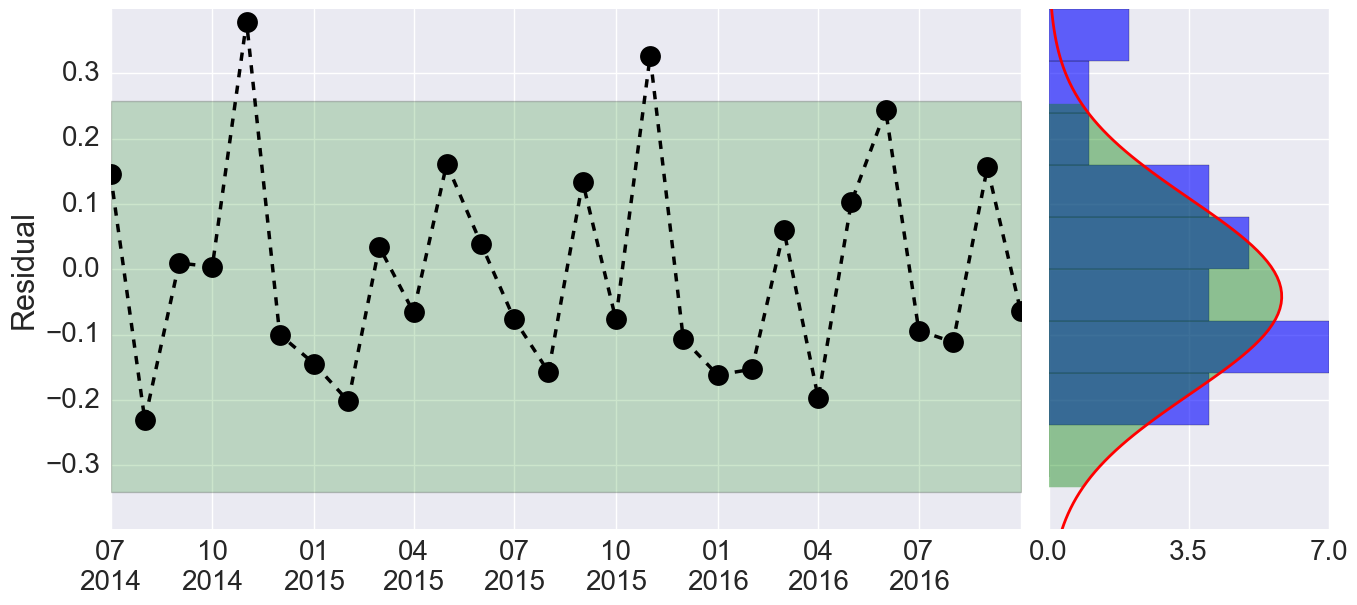

In [534]:
# from matplotlib.ticker import NullFormatter
from scipy import stats
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline

#Fit the data
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

fig = figure()
fig.set_size_inches(14, 8)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    
# the data
x = pd.to_datetime(a.index)
y = a.values

# Smooth spline for centroid subtraction
spl = UnivariateSpline(x, y)
spl.set_smoothing_factor(20000)

y_SG = savgol_filter(y, 9, 2)

#centroid subtract 
y = ( y - y_SG ) / y_SG
#y = ( y - spl(np.float64(x)) ) / spl(np.float64(x))

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))


axScatter = plt.axes(rect_scatter)
#axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.plot(x, y, '--o', markersize=15, color = 'k')
axScatter.set_ylabel('Residual') #\n (O-E)/E
axScatter.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
# Hide last tick
axScatter.xaxis.get_ticklabels()[-1].set_visible(False)


#plot spline
#axScatter.plot(x, spl(np.float64(x)), 'b', lw=3)

# now determine limits:
#ymin, ymin = np.min(y), np.max(y)
yabsmax = np.max( [np.abs(np.min(y)), np.max(y)])
ymin, ymax = -1.05 * yabsmax, 1.05 * yabsmax

#xbinwidth = 1
ybinwidth = (ymax - ymin) / 10

#axScatter.set_xlim((xmin, xmax))
axScatter.set_ylim((ymin, ymax))

#Make Histogram

#xbins = np.arange(xmin, xmax + xbinwidth, xbinwidth)
ybins = np.arange(ymin, ymax + ybinwidth, ybinwidth)
#axHistx.hist(x, bins=xbins)
yhist = axHisty.hist(y, bins=ybins, orientation='horizontal', color='b', alpha = 0.6, normed=False)
ycenters = (ybins[:-1] + ybins[1:]) / 2

#axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
axHisty.set_xticks(np.linspace(0, max(yhist[0]), 3))

popt, pcov = curve_fit(gaussian, ycenters, yhist[0], [5, 0, .1])

# Plot the PDF.
xfit = np.linspace(ymin, ymax, 100)
p = gaussian(xfit, *popt)
axHisty.plot(p, xfit, 'r', linewidth=2)

#Fill 2 sigma
mu = popt[1]
sigma = popt[2]
Nsig = 2

sig_cut = (xfit <= mu + Nsig*sigma) & (xfit >= mu - Nsig*sigma) 
axHisty.fill(np.append(np.append([0], p[sig_cut]), [0]), np.append(np.append(xfit[sig_cut][0], xfit[sig_cut]), xfit[sig_cut][-1]),\
             'g', linewidth=0, alpha=0.4)


axScatter.fill_between(x, mu - Nsig*sigma, mu + Nsig*sigma,
            alpha=0.2, edgecolor=None, facecolor='g',
            linewidth=1, linestyle='solid', antialiased=True, label=r'2 $\sigma$')

plt.show()

<h1> test timing </h1>

In [211]:
import time

0.000214099884033


In [275]:
start_time = time.time()
for i in range(100):
    spl = UnivariateSpline(x, y)
    #spl.set_smoothing_factor(20000)
print (time.time() - start_time) / 100

error: failed in converting 2nd argument `y' of dfitpack.fpcurf0 to C/Fortran array

In [265]:
x[::3].astype(int)

array([ 72,  80,  88,  97, 105, 114, 122, 131, 139, 148, 156, 165, 173,
       182, 190, 199, 207, 216, 224, 233, 241, 250, 258, 267, 275, 284,
       292, 301, 309, 318, 326, 335, 343, 352])

In [243]:
start_time = time.time()
for i in range(100):
    y_SG = savgol_filter(y, 5, 4)
print (time.time() - start_time) / 100

0.000634219646454


In [253]:
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline

In [204]:
def movingaverage(interval, window_size):
    window = numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')
movingaverage(a.values, 10)

array([  49.4,   62.8,   79. ,   90.7,  108.4,  132.4,  141.5,  149.3,
        159.7,  168.2,  179.5,  188.1,  194.6,  205.8,  214.7,  215.7,
        223.3,  231.9,  230.5,  235.8,  244.2,  248.3,  260.8,  260.5,
        233.9,  208.9,  185. ,  161. ])

In [397]:
axScatter.yaxis.set_label('Residual \n (O-E)/E')

In [324]:
popt[2]

0.089621844880431289

<p> Mention why it's not enough to centroid subtract. What matters more is the fraction change. For example the mean value had risen from 100 to 300. A deviation of +30 at 100 is more significant fractionally than it is from the baseline of 300 </p>

In [ ]:
<p> 

<h1> Functions </h1>

In [424]:
def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return  pd.to_datetime(series.index), series.values
    
def frac_err(num, sig_num, den, sig_den):
    return sqrt( (sig_num / den) ** 2 + ((sig_den * num) / (den**2)) ** 2)


def plot_ind_region(dataframe, indicator, region, date_type='E_Date', val_name='val', ind2=None, plt_err=False, plt_mean=False, plt_std=False, plt_mean_std=False, x_range=[0,-1], ylab=None):
    to_plot = dataframe[(DF['Indicator'] == indicator) & (DF['Region'] == region)].reset_index()\
            .groupby([date_type])[val_name].sum()
    to_plot = to_plot[x_range[0]:x_range[1]]
    yn = to_plot.values
    sqrtNn = sqrt(yn)
    y_err = sqrtNn
    
    if ylab:
        ylab_text = ylab
    else:
        ylab_text = indicator

    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot_d = dataframe[(dataframe['Indicator'] == ind2) & (DF['Region'] == region)]\
                .reset_index().groupby([date_type])[val_name].sum()
        to_plot /= to_plot_d
        yt = to_plot_d.values
        sqrtNt = sqrt(yt)
        y_err = frac_err(yn, sqrtNn, yt, sqrtNt)
        #use binomial error
        p = to_plot.values
        y_err = sqrt( p*(1-p) / yt )
        ylab_text = '%s per \n %s' % (indicator, ind2)
    
    
    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
    x, y = pd_proper_dateformat(to_plot)
    y_mean = ones_like(y)*mean(y)
    y_std = np.std(y)
    y_mean_err = y_std / sqrt(len(y))
    
    plt.plot_date(x, y, '.-', color='k', markersize=20, label='Nation',)
    
    if plt_err:
        plt.fill_between(x, y-y_err, y+y_err,
            alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
            linewidth=4, linestyle='dashdot', antialiased=True, label=r'1 $\sigma$')
    if plt_std:
        plt.fill_between(x, y_mean-y_std, y_mean+y_std,
        alpha=0.2, edgecolor='black', facecolor='grey',
        linewidth=4, linestyle='dashdot', antialiased=True)
    if plt_mean:
        plt.plot_date(x, y_mean, '-', color='k', markersize=20, label='Mean',)
    if plt_mean_std:    
        plt.fill_between(x, y_mean-y_mean_err, y_mean+y_mean_err,
        alpha=0.2, edgecolor='black', facecolor='grey',
        linewidth=4, linestyle='dashdot', antialiased=True)
    
    #x has to be in int to fit the data
    x_fit = x.astype(int)
    fit = np.poly1d(np.polyfit(x_fit, y, 1))
    y_lin = fit(x_fit)
    
    plt.plot_date(x, y_lin,'-', color='r', label='Liner Fit',)
    
    ylabel(' malaria\n'.join(ylab_text.split('malaria')))
    #xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    
    return to_plot